<img src="images/MLP.png">

In [1]:
import numpy as np
import math

class MLP():
    # Constructor
    def __init__(self, lr, e, neurons):
        self.lr = lr # Taxa de aprendizado
        self.e = e # Tolerância
        self.neurons = neurons # Quantidade de neurônios por camadas

    # Calcula a sigmoid de um valor      
    def sigmoid(self, valor):
        return 1 / (1 + math.e**(-valor))
    
    # Calcula a derivada da função sigmoid
    def sigmoid_deriv(self, valor):
        sig = self.sigmoid(valor)
        return sig * (1 - sig)

    # Ativa as saídas do neurônio
    def activate(self, valor):
        return self.sigmoid(valor)
    
    # Calcular a derivada da função de ativação
    def deriv(self, valor):
        return self.sigmoid_deriv(valor)

    # Calcula a diferença entre o valor real e o valor predito
    def evaluate(self, target, predicted):
        return target - predicted

    # Calcula a soma ponderada das entradas pelo peso
    def predict(self, input_data, weights):
        return np.dot(input_data, weights).reshape(1, -1)

In [3]:
def train(self, x, d):
    # Inicializa aleatoriamente os pesos para cada camada da rede
    # Pesos da camada de entrada para a 1ª camada oculta
    self.w1 = np.random.random((x.shape[1] + 1, self.neurons[0]))

    # Pesos da 1ª para a 2ª camada oculta
    self.w2 = np.random.random((self.neurons[0], self.neurons[1]))

    # Pesos da 2ª camada oculta para a camada de saída
    self.w3 = np.random.random((self.neurons[1], self.neurons[2]))

    epoch = 0
    last_mse = np.inf # Inicializa o MSE anterior como infinito
    self.total_mse = [] # Armazena os valores de MSE para cada época
    self.bias = -1
    
    # Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
    while True:
        mse = 0
        for xi, target in zip(x, d):
            # Adiciona o bias à entrada
            input_value = np.insert(xi, 0, self.bias)

            # Forward pass: Calcula as ativações da rede
            i1 = self.predict(input_value, self.w1)   # Soma ponderada para a 1ª camada
            y1 = self.activate(i1)                    # Ativação da 1ª camada
            i2 = self.predict(y1, self.w2)            # Soma ponderada para a 2ª camada
            y2 = self.activate(i2)                    # Ativação da 2ª camada
            i3 = self.predict(y2, self.w3)            # Soma ponderada para a camada de saída
            y3 = self.activate(i3)                    # Ativação da camada de saída
            
            # Calcula o erro atual
            current_error = self.evaluate(target, y3)
            mse += (current_error ** 2)
            
            # Backpropagation: Calcula os deltas (gradientes de erro)
            delta3 = (target - y3) * self.deriv(i3) # Delta da camada de saída
            self.w3 += self.lr * np.dot(y2.T, delta3) # Atualiza os pesos da 2ª camada para a saída

            delta2 = np.dot(delta3, self.w3.T) * self.deriv(i2)  # Delta da 2ª camada oculta
            self.w2 += self.lr * np.dot(y1.T, delta2)  # Atualiza os pesos da 1ª camada para a 2ª camada

            delta1 = np.dot(delta2, self.w2.T) * self.deriv(i1)  # Delta da 1ª camada oculta
            self.w1 += self.lr * np.dot(input_value.reshape(1, -1).T, delta1) # Atualiza os pesos da entrada para a 1ª camada
        
        # Calcula o MSE médio da época
        mse = mse / len(x)
        
        # Exibe o MSE da época atual e a diferença em relação à época anterior
        print(f"EPOCA: {epoch} - MSE_atual: {mse} - |mse_anterior - mse_atual|: {abs(last_mse - mse)}")
        if abs(last_mse - mse) <= self.e:
            break
            
        # Armazena o MSE atual e atualiza o MSE anterior
        self.total_mse.append(mse)
        last_mse = mse
        epoch += 1

# Atribui a função `train` como um método da classe MLP.
MLP.train = train  

In [4]:
# Função de teste para avaliar novos dados de entrada  
def test(self, x):
    results = []
    for xi in x:
        input_value = np.insert(xi, 0, self.bias) # Adiciona o bias à entrada
        i1 = self.predict(input_value, self.w1)   # Soma ponderada para a 1ª camada
        y1 = self.activate(i1)                    # Ativação da 1ª camada
        i2 = self.predict(y1, self.w2)            # Soma ponderada para a 2ª camada
        y2 = self.activate(i2)                    # Ativação da 2ª camada
        i3 = self.predict(y2, self.w3)            # Soma ponderada para a camada de saída
        y3 = self.activate(i3)                    # Ativação da camada de saída
        
        results.append(int(np.rint(y3[0][0])))  # Garante a extração de um único elemento
    
    return results

# Atribui a função `test` como um método da classe MLP.
MLP.test = test

In [5]:
import numpy as np

# Gerar características
num_samples = 100
num_features = 5
X1 = np.random.normal(0, 1, size=(num_samples, num_features))  # Gera dados com distribuição normal (média = 0, desvio padrão = 1)
X2 = np.random.normal(2, 1, size=(num_samples, num_features))  # Gera dados com distribuição normal (média = 2, desvio padrão = 1)

# Combinar as características
X = np.concatenate([X1, X2], axis=0)  # Junta os dois conjuntos de dados ao longo da primeira dimensão (amostras)

# Gerar a variável alvo
y1 = np.zeros(num_samples)  # Classe 0
y2 = np.ones(num_samples)   # Classe 1
y = np.concatenate([y1, y2])  # Junta as classes 0 e 1

# Embaralhar os dados
idx = np.random.permutation(len(X))  # Gera um índice aleatório para embaralhar os dados
X = X[idx]  # Aplica o índice aleatório nas características
y = y[idx]  # Aplica o índice aleatório nas classes

# Inicializar e treinar a MLP
mlp = MLP(lr=0.1, e=0.00001, neurons=[5, 4, 1])  # Cria uma instância da rede neural MLP com taxa de aprendizado 0.1, erro tolerado 0.00001, e camadas de 5, 4 e 1 neurônios
mlp.train(X, y)  # Treina a rede com os dados X e as classes y

# Testar a MLP
predictions = mlp.test(X)  # Realiza previsões para as características X
print(f"Predictions: {predictions}")  # Exibe as previsões geradas pela rede neural

EPOCA: 0 - MSE_atual: [[0.28931282]] - |mse_anterior - mse_atual|: [[inf]]
EPOCA: 1 - MSE_atual: [[0.24876271]] - |mse_anterior - mse_atual|: [[0.04055011]]
EPOCA: 2 - MSE_atual: [[0.24776376]] - |mse_anterior - mse_atual|: [[0.00099895]]
EPOCA: 3 - MSE_atual: [[0.24740968]] - |mse_anterior - mse_atual|: [[0.00035408]]
EPOCA: 4 - MSE_atual: [[0.24698017]] - |mse_anterior - mse_atual|: [[0.00042952]]
EPOCA: 5 - MSE_atual: [[0.2463912]] - |mse_anterior - mse_atual|: [[0.00058897]]
EPOCA: 6 - MSE_atual: [[0.24552437]] - |mse_anterior - mse_atual|: [[0.00086683]]
EPOCA: 7 - MSE_atual: [[0.24414611]] - |mse_anterior - mse_atual|: [[0.00137825]]
EPOCA: 8 - MSE_atual: [[0.24177902]] - |mse_anterior - mse_atual|: [[0.00236709]]
EPOCA: 9 - MSE_atual: [[0.23751029]] - |mse_anterior - mse_atual|: [[0.00426873]]
EPOCA: 10 - MSE_atual: [[0.23010606]] - |mse_anterior - mse_atual|: [[0.00740423]]
EPOCA: 11 - MSE_atual: [[0.21929459]] - |mse_anterior - mse_atual|: [[0.01081147]]
EPOCA: 12 - MSE_atual:

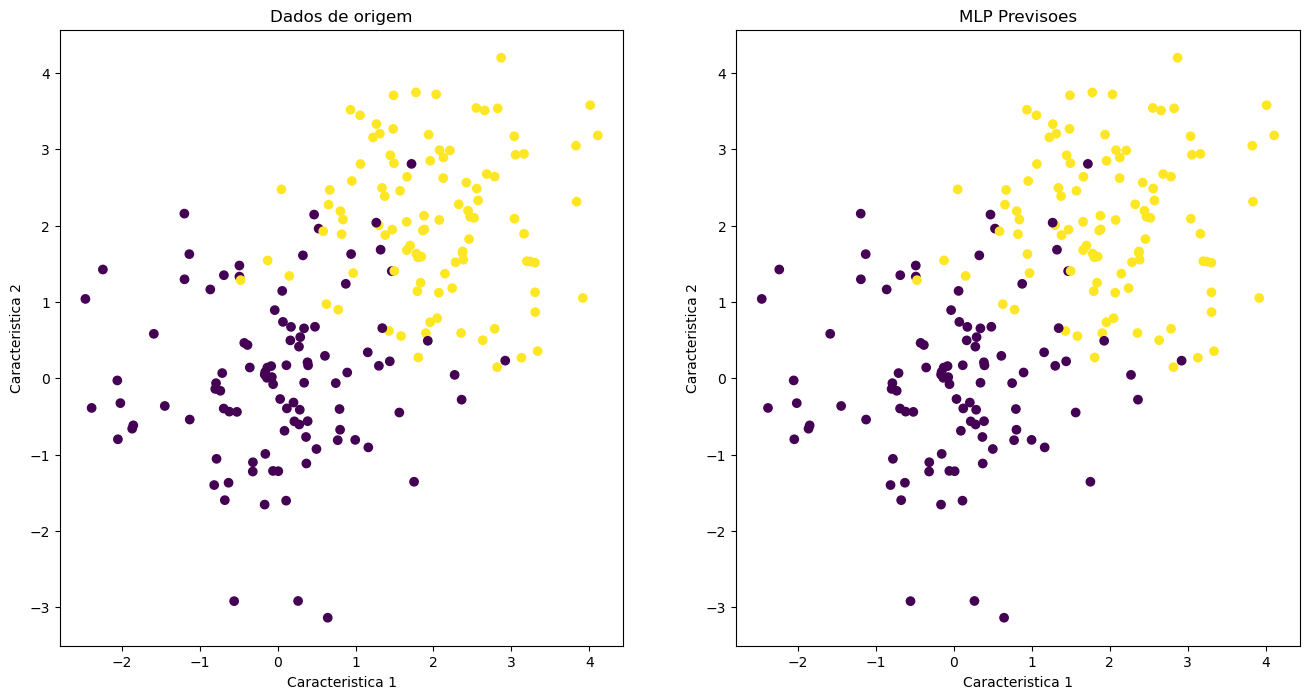

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# Grafico dos dados de origem
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Dados de origem')
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')

# Grafico dos resultados
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis')
plt.title('MLP Previsoes')
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')

plt.show()

Acurácia no Conjunto de Teste: 0.9775


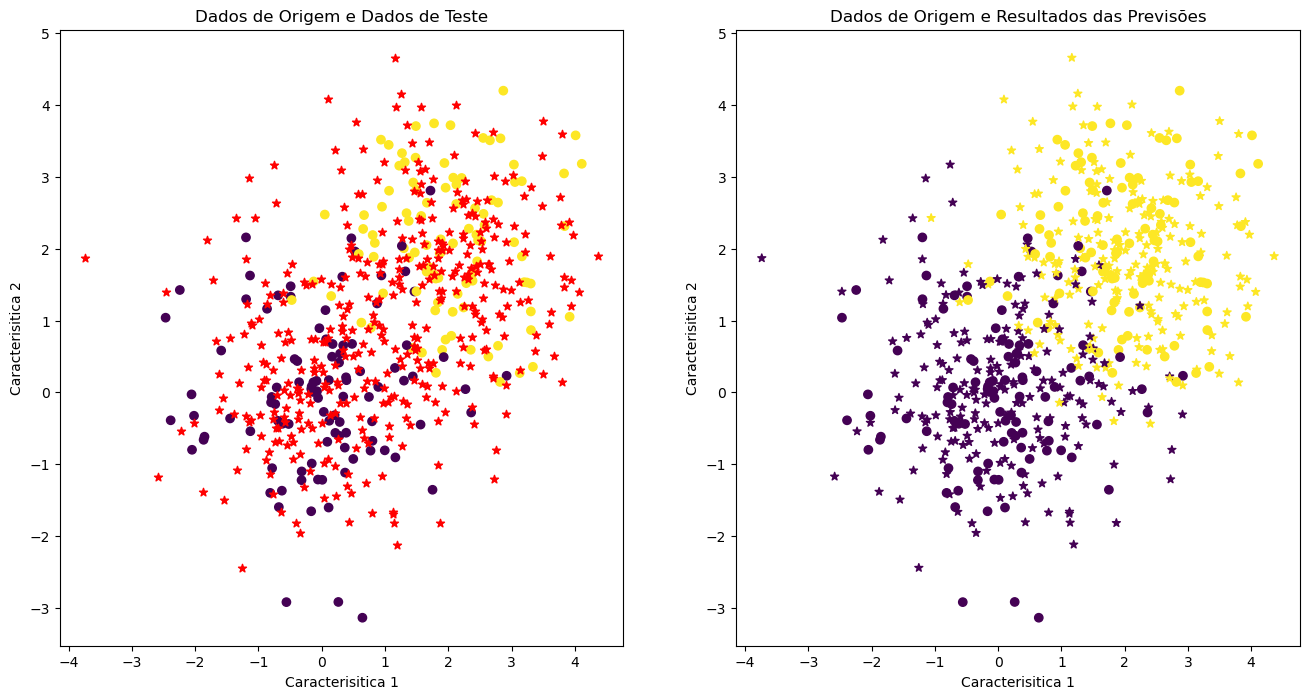

In [7]:

num_test_samples = 200 # Número de amostras no conjunto de teste

# Gera dados para a classe 0 (distribuição normal com média 0)
X_test1 = np.random.normal(0, 1, size=(num_test_samples, num_features))

# Gera dados para a classe 1 (distribuição normal com média 2)
X_test2 = np.random.normal(2, 1, size=(num_test_samples, num_features))

# Combina os dados para o conjunto de teste
X_test = np.concatenate([X_test1, X_test2], axis=0)

# Gerar as variáveis alvo para o conjunto de teste
y_test1 = np.zeros(num_test_samples)  # Classe 0
y_test2 = np.ones(num_test_samples)   # Classe 1
y_test = np.concatenate([y_test1, y_test2])  # Junta as duas classes

# Embaralha os dados do conjunto de teste
idx_test = np.random.permutation(len(X_test))  # Gera um índice aleatório para embaralhamento
X_test = X_test[idx_test] # Aplica o embaralhamento nos dados de entrada
y_test = y_test[idx_test] # Aplica o embaralhamento nos rótulos

# Fazendo as previsões no conjunto de teste com o modelo treinado
predictions = mlp.test(X_test)

# Calculando a acurácia do modelo no conjunto de teste
accuracy = np.mean(predictions == y_test)

print(f"Acurácia no Conjunto de Teste: {accuracy}")

plt.figure(figsize=(16, 8))

# Grafico dos dados de origem e os dados de teste
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker = "*")
plt.title('Dados de Origem e Dados de Teste')
plt.xlabel('Caracterisitica 1')
plt.ylabel('Caracterisitica 2')

# Grafico dos dados de origem e as previsões para os dados de teste
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', marker = "*")
plt.title('Dados de Origem e Resultados das Previsões')
plt.xlabel('Caracterisitica 1')
plt.ylabel('Caracterisitica 2')

plt.show()